In [1]:
import pyedflib
import numpy as np
import pandas as pd
import wfdb
import matplotlib.pyplot as plt
import yasa
from bs4 import BeautifulSoup

# EDA of first participant in visit 2

In [2]:
f = pyedflib.EdfReader("shhs2-200077.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sig = []
for i in np.arange(n):
    sig.append(f.readSignal(i))

f.close()

sigs = dict(zip(signal_labels,sig))

In [3]:
sigs

{'SaO2': array([95.11558709, 96.09216449, 96.09216449, ...,  0.10070954,
         0.10070954,  0.10070954]),
 'PR': array([76.37140459, 77.34798199, 79.3011368 , ...,  0.20141909,
         0.20141909,  0.20141909]),
 'EEG(sec)': array([ -2.45098039,  -8.33333333, -16.17647059, ..., 125.        ,
        125.        , 125.        ]),
 'ECG': array([0.21078431, 0.20098039, 0.19117647, ..., 1.25      , 1.25      ,
        1.25      ]),
 'EMG': array([ -2.59411765,  -1.85294118,  -3.08823529, ...,  31.5       ,
        -31.25294118,  31.5       ]),
 'EOG(L)': array([ 11.2745098 ,  21.07843137, -14.21568627, ..., 125.        ,
        125.        , 125.        ]),
 'EOG(R)': array([ -23.03921569,  -16.17647059,    5.39215686, ..., -124.01960784,
        -124.01960784, -124.01960784]),
 'EEG': array([ -6.37254902,  16.17647059,  19.11764706, ..., 125.        ,
        125.        , 125.        ]),
 'AIRFLOW': array([-0.90588235, -0.49019608, -0.09019608, ..., -0.01176471,
        -0.01176471

In [4]:
sigs_name = sigs.keys()
sigs_name

dict_keys(['SaO2', 'PR', 'EEG(sec)', 'ECG', 'EMG', 'EOG(L)', 'EOG(R)', 'EEG', 'AIRFLOW', 'THOR RES', 'ABDO RES', 'POSITION', 'LIGHT', 'OX STAT'])

In [5]:
sigs_short = {}
for i in sigs.keys():
    sigs_short[i] = sigs[i][:50]
df = pd.DataFrame(sigs_short, columns = sigs_name)
df.head(5)

,SaO2,PR,EEG(sec),ECG,EMG,EOG(L),EOG(R),EEG,AIRFLOW,THOR RES,ABDO RES,POSITION,LIGHT,OX STAT
0,95.115587,76.371405,-2.450980,0.210784,-2.594118,11.274510,-23.039216,-6.372549,-0.905882,-0.286275,-0.607843,3.0,0.0,0.0
1,96.092164,77.347982,-8.333333,0.200980,-1.852941,21.078431,-16.176471,16.176471,-0.490196,-0.247059,-0.521569,3.0,0.0,0.0
2,96.092164,79.301137,-16.176471,0.191176,-3.088235,-14.215686,5.392157,19.117647,-0.090196,-0.160784,-0.466667,3.0,0.0,0.0
3,96.092164,81.254292,-26.960784,0.191176,5.311765,-8.333333,8.333333,10.294118,0.239216,-0.090196,-0.294118,3.0,0.0,0.0
4,96.092164,83.207446,-16.176471,0.181373,-8.770588,-10.294118,6.372549,5.392157,0.474510,0.027451,0.278431,3.0,0.0,0.0


Variables: SaO2, Heart Rate, EEG(sec), ECG, EMG, EOG(L), EOG(R), EEG, Airflow, Abdomen, Thorax, Position, Light, Oximetry Status

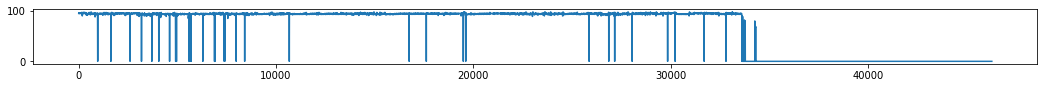

In [6]:
plt.figure(figsize=(18,1))
plt.plot(np.arange(0,len(sigs['SaO2']),1), sigs['SaO2'])

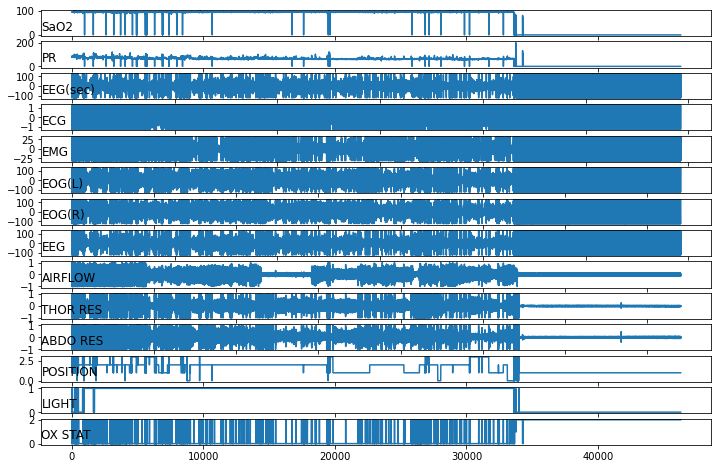

In [7]:
plt.figure(figsize=(12,8))
for i, d in enumerate(sigs):
    ax = plt.subplot(14,1,i+1)
    plt.title(d,loc = 'left',y= 0)
    # get axis in hours
    #plt.plot(np.arange(0,1000,1), sigs[d][:1000])
    plt.plot(np.arange(0,len(sigs[d]),1), sigs[d])

#### we want to adopt the 30 second epoch

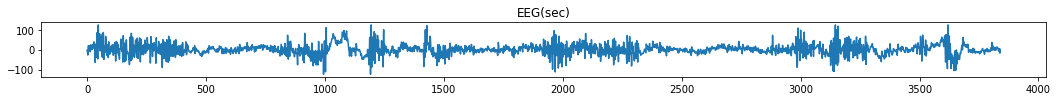

In [8]:
# 30 second epoch
epoch = 30
freq_EEG = 128
plt.figure(figsize=(18,1))
plt.plot(np.arange(0,epoch*freq_EEG,1), sigs['EEG(sec)'][:epoch*freq_EEG])
# plt.legend( title = "Legend", title_fontsize = 15)
plt.title('EEG(sec)')
# Save the image
plt.savefig('EEG(sec).png')

Text(0.5, 1.0, 'ECG')

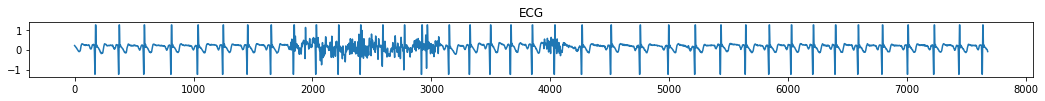

In [9]:
# 30 second epoch
freq_ECG = 256
plt.figure(figsize=(18,1))
plt.plot(np.arange(0,epoch*freq_ECG,1), sigs['ECG'][:epoch*freq_ECG])
plt.title('ECG')
# Save the image
# plt.savefig('ECG.png')

Text(0.5, 1.0, 'EOG(L)')

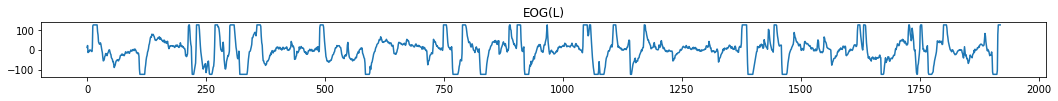

In [10]:
# 30 second epoch
freq_EOG = 64
plt.figure(figsize=(18,1))
plt.plot(np.arange(0,30*freq_EOG,1), sigs['EOG(L)'][:30*freq_EOG])
plt.title('EOG(L)')
# Save the image
# plt.savefig('EOG(L).png')

Text(0.5, 1.0, 'EOG(R)')

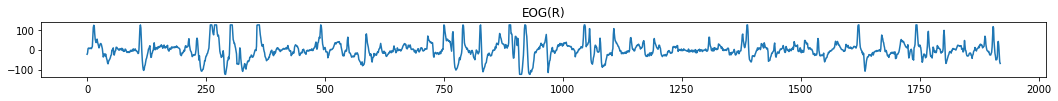

In [11]:
# 30 second epoch
plt.figure(figsize=(18,1))
plt.plot(np.arange(0,epoch*freq_EOG,1), sigs['EOG(R)'][:epoch*freq_EOG])
plt.title('EOG(R)')
# Save the image
# plt.savefig('EOG(R).png')

## spectrogram: 
is a visual representation of the spectrum of frequencies of a signal as it varies with time. 

(array([[9.02298517e+00, 1.65027095e+01, 1.02070607e+01, ...,
         1.39237851e+01, 1.18615315e+02, 5.76917848e+01],
        [4.99823435e+01, 5.65603681e+01, 3.91358162e+00, ...,
         5.07806811e+01, 5.77663929e+02, 1.74720465e+01],
        [4.88211691e+00, 3.74011037e+01, 9.35003921e+00, ...,
         8.67742031e+00, 5.48051979e+02, 2.50428802e+02],
        ...,
        [7.03426008e-01, 3.76024388e-03, 1.34358282e-02, ...,
         1.68233991e-02, 2.63234604e-02, 1.73553400e-02],
        [5.40250891e-01, 4.36480284e-02, 9.34734867e-02, ...,
         3.75159846e-02, 4.34908045e-02, 7.39029349e-03],
        [4.02875032e-02, 1.68302882e-02, 5.17908475e-02, ...,
         3.12165942e-02, 3.72525110e-02, 1.48783882e-03]]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. ,

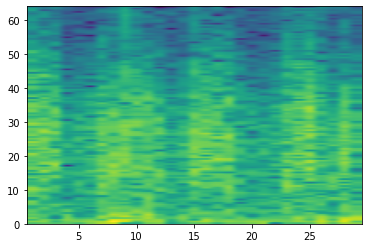

In [12]:
plt.specgram(sigs['EEG(sec)'][:epoch*freq_EEG],Fs=freq_EEG)

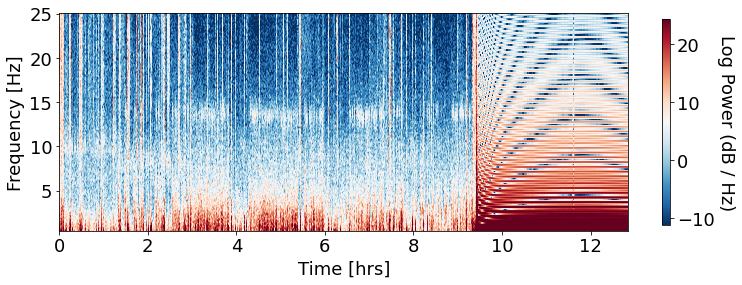

In [13]:
fig = yasa.plot_spectrogram(sigs['EEG(sec)'], sf = freq_EEG)

# EDA of Visit 2

In [14]:
# desc_dir = root_dir + 'shhs/datasets/shhs2-dataset-0.16.0.csv'
desc_dir = 'shhs/datasets/shhs2-dataset-0.16.0.csv'

# Visit 2 does not have 'ethnicity' and 'ParRptDiab' (History of Diabetes ) variables
# can be obtained from visit 1
usecols = ['nsrrid', 'visitnumber', 'gender', 'age_s2', 'overall_shhs2', 
           'race', 'bmi_s2', 'ahi_a0h3', 'HTNDerv_s2']

df_shhs = pd.read_csv(desc_dir, usecols=usecols)
print(df_shhs.shape)

# Rename columns
df_shhs.rename(columns={'nsrrid': 'subj',
                        'gender1': 'gender',
                        'age_s2': 'age',
                        'overall_shhs2': 'overall',
                        'bmi_s2': 'bmi',
                        'ahi_a0h3': 'ahi',
                        'HTNDerv_s2': 'hypertension'
                        #'ParRptDiab': 'diabete'
                      }, inplace=True)

# modify the race column
df_shhs['race'].replace({1: 'White', 2: 'Black', 3: 'Other'}, inplace=True)

# ethnicity column (in case we need it)
# df_shhs.loc[df_shhs['ethnicity'] == 1, 'race'] = 'hispanic'
# df_shhs.drop(columns=['ethnicity'], inplace=True)
# df_shhs.rename(columns={'race': 'ethnicity'}, inplace=True)

df_shhs['male'] = (df_shhs['gender'] == 1).astype(int)

# Keep only first visit
df_shhs = df_shhs[df_shhs['visitnumber'] == 2]

# Convert to str
df_shhs['subj'] = df_shhs['subj'].apply(lambda x: str(x).zfill(4))
df_shhs.set_index('subj', inplace=True)

(4080, 9)


In [15]:
# overall_shhs2 =  Overall signal quality
# 1: Unsatisfactory
# 2: Poor
# 3: Fair
# 4: Good
# 5: Very Good
# 6: Excellent
# 7: Outstanding
# Keep only "Excellent" quality study
# print(df_shhs[df_shhs['overall'] < 6].shape[0], 
#       'subjects with bad PSG data quality will be removed.')
# df_shhs = df_shhs[df_shhs['overall'] >= 6]

In [16]:
df_shhs

,overall,age,hypertension,bmi,visitnumber,ahi,gender,race,male
subj,,,,,,,,,
200077,5.0,46,0,23.388687,2,9.738220,1,White,1
200078,5.0,59,1,30.211833,2,19.685039,1,White,1
200079,6.0,61,0,35.451050,2,26.000000,2,Other,0
200080,5.0,59,0,32.645673,2,12.450000,1,White,1
200081,6.0,45,0,31.644286,2,2.632794,2,White,0
...,...,...,...,...,...,...,...,...,...
205798,5.0,64,1,30.804282,2,13.350000,1,White,1
205799,NaN,59,0,33.059629,2,NaN,2,White,0
205800,6.0,71,1,26.418929,2,56.115108,1,White,1


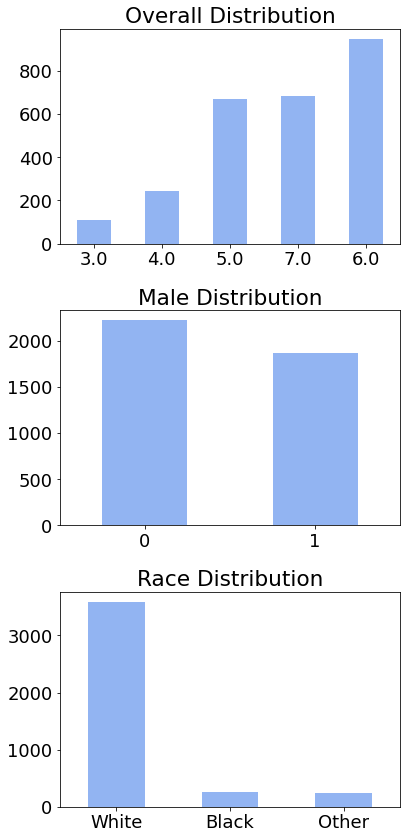

In [17]:
fig = plt.figure(figsize=(6,12))
cat = ['overall','male','race']

for i,category in enumerate(cat):
    ax=fig.add_subplot(len(cat),1,i+1)
    if i == 0:
        df_shhs[category].value_counts().sort_values(ascending=True).\
            plot(kind='bar',alpha = 0.7, color = 'cornflowerblue')
    else:
        df_shhs[category].value_counts().plot(kind='bar',alpha = 0.7, color = 'cornflowerblue')
    plt.xticks(rotation=0)
    ax.set_title(category.capitalize()+" Distribution")
    plt.grid(False)

fig.tight_layout()

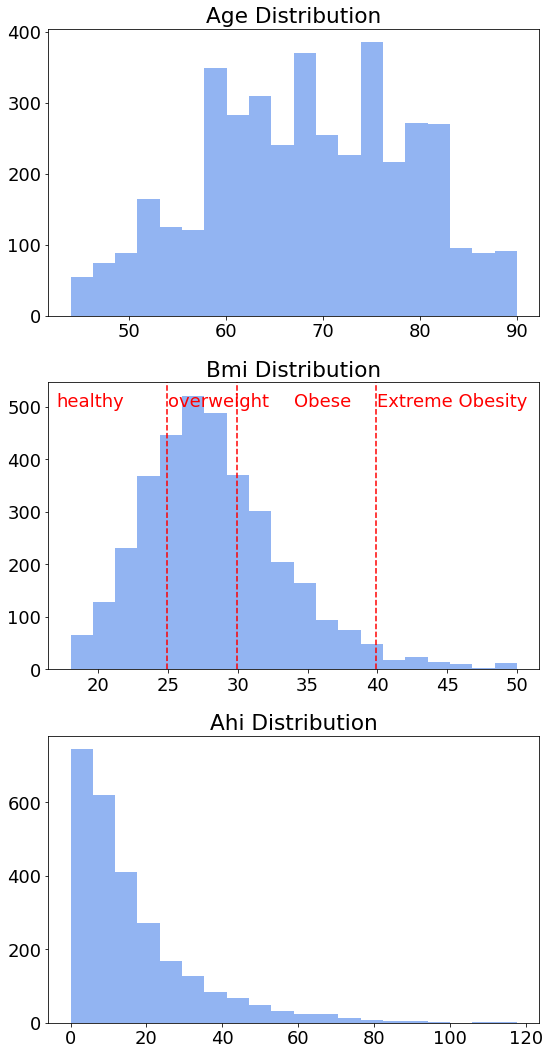

In [18]:
fig = plt.figure(figsize=(8,15))
cat = ['age','bmi','ahi']


for i,category in enumerate(cat):
    ax=fig.add_subplot(len(cat),1,i+1)
    df_shhs[category].hist(bins=20, color = 'cornflowerblue',alpha = 0.7)
    if i == 1:
        plt.axvline(x=24.9, color = 'red', linestyle='--')
        plt.text(17,500,'healthy', color = 'red')
        plt.axvline(x=29.9, color = 'red', linestyle='--')
        plt.text(25,500,'overweight', color = 'red')
        plt.axvline(x=39.9, color = 'red', linestyle='--')
        plt.text(34,500,'Obese', color = 'red')
        plt.text(40,500,'Extreme Obesity', color = 'red')
        
    ax.set_title(category.capitalize()+" Distribution")
    plt.grid(False)

fig.tight_layout()
# plt.savefig('distribution.png')